# Linear Regression with one variable

In [76]:
import pandas as pd 
import os 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Data 

In [77]:
path = os.getcwd() + '/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


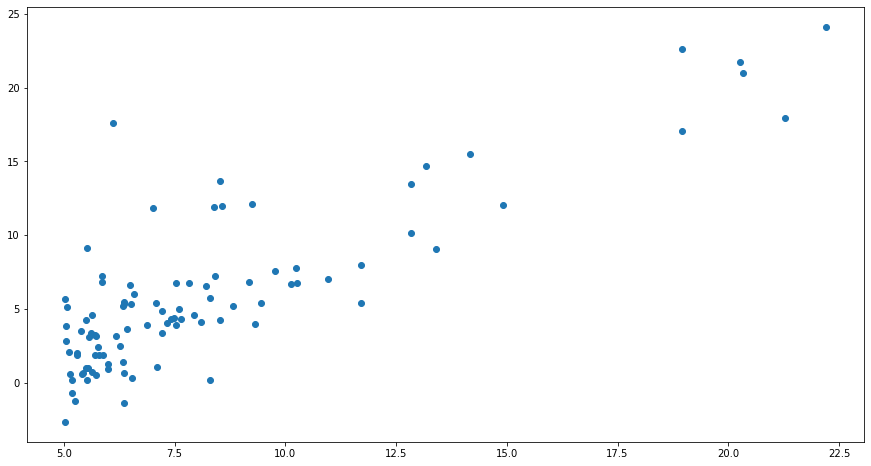

In [78]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter( x = data['Population'], y = data['Profit']  )

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


## Linear Model

In [80]:
data.insert(0, 'theta0', 1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [81]:
data.shape, X.shape, y.shape

((97, 3), (97, 2), (97, 1))

In [82]:
data.head()

,theta0,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


##### Changing X, Y and theta into numpy matrices

In [83]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0])) #initializtion to zeroes

In [84]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

### Cost  Function

In [85]:
def predict(theta0, theta1, X):
    '''Simple Predcition function'''
    return theta1*X + theta0

In [86]:
predict(1,2,X)[:5]#Testing and viewing first 5 observations

matrix([[ 3.    , 13.2202],
        [ 3.    , 12.0554],
        [ 3.    , 18.0372],
        [ 3.    , 15.0064],
        [ 3.    , 12.7196]])

In [87]:
def error(theta0, theta1, X, y):
    """Error computation function"""
    return y - predict(theta0, theta1, X)

In [88]:
error(1,2,X,y)[:5]#Testing and viewing first 5 observations

matrix([[14.592 ,  4.3718],
        [ 6.1302, -2.9252],
        [10.662 , -4.3752],
        [ 8.854 , -3.1524],
        [ 3.8233, -5.8963]])

In [89]:
def computeCost(X, y, theta):
    '''Computing the cost function(MSE) on entire dataframe'''
    inner = np.power(((X * theta.T) - y), 2) 
    return np.sum(inner) / (2 * len(X))

In [90]:
computeCost(X, y, theta)

32.072733877455676

### Gradient Descent

In [91]:
def gradientDescent(X,y,theta, alpha, iters):
    #initialzation
    temp = np.matrix(np.zeros(theta.shape)) #shape = (1,2)
    weights = int(theta.ravel().shape[1]) 
    cost = np.zeros(iters)
    
    #error and updating weights
    for i in range(iters):
        #error
        error = ((X*theta.T) - y)
        #updating weights:
        for j in range(weights):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        
        theta = temp #assigning the updated weights or theta
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

### Training and fitting

In [92]:
alpha = 0.01
iters = 2000

Theta, cost = gradientDescent(X, y, theta, alpha, iters)
Theta,cost

(matrix([[-3.78806857,  1.18221277]]),
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.47803526, 4.47803143,
        4.47802761]))

In [93]:
computeCost(X, y, Theta)

4.4780276098799705

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

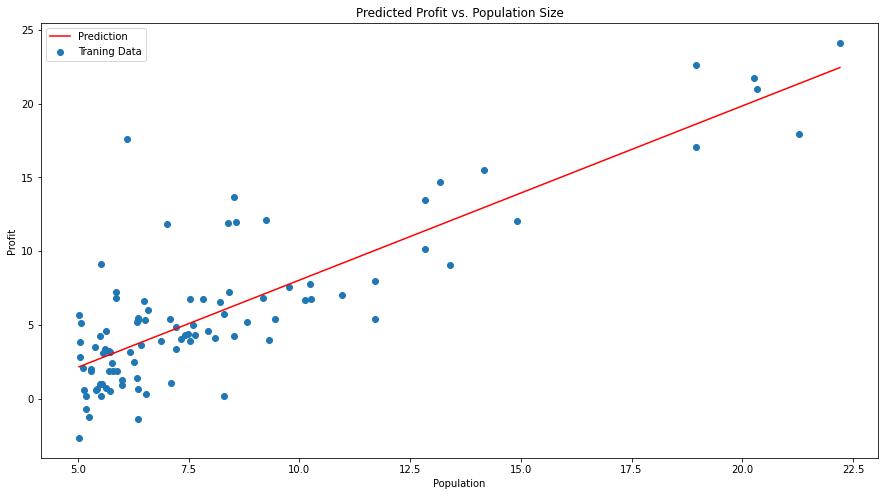

In [94]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = Theta[0, 0] + (Theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

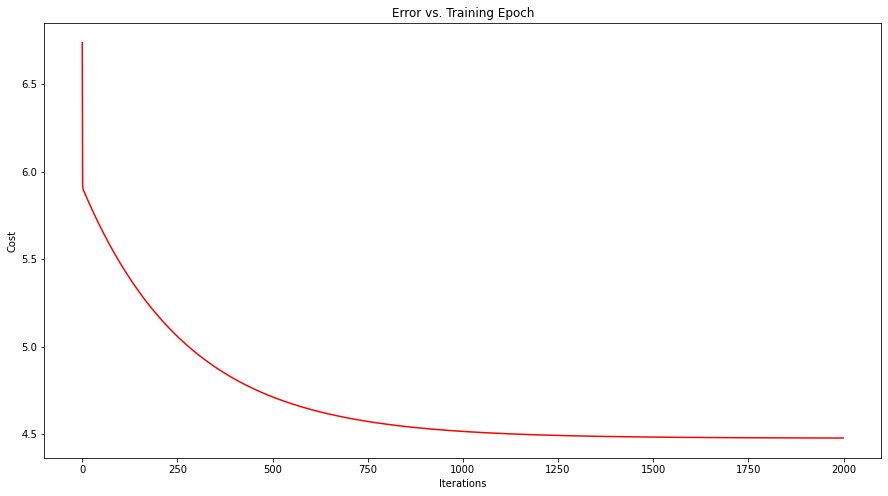

In [95]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Measurement of Error

In [96]:
def ord_lms(X_1,Y_1):
    # mean of our inputs and outputs
    x_mean = np.mean(X_1)
    y_mean = np.mean(Y_1)
    #total number of values
    m = len(X_1)

    # using the formula to calculate the b1 and b0
    numerator = 0
    denominator = 0

    for i in range(m):
        numerator += (X_1[i] - x_mean) * (Y_1[i] - y_mean)
        denominator += (X_1[i] - x_mean) ** 2


    b1 = numerator / denominator
    b0 = y_mean - (b1 * x_mean)
    return b1, b0


In [97]:
X_1 = data['Population'].values
Y_1 = data['Profit'].values

In [98]:
b1,b0 =ord_lms(X_1,Y_1)

In [99]:
b1,b0

(1.193033644189594, -3.8957808783118537)

### R-square

In [100]:
sumofsquares = 0
sumofresiduals = 0
y_mean = np.mean(Y_1)
m = len(X)    
for i in range(m) :
    y_pred = b0 + b1 * X_1[i]
    sumofsquares += (Y_1[i] - y_mean) ** 2
    sumofresiduals += (Y_1[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.7020315537841397


# Scikit-Learn Implementation with test and train data

In [101]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
X_1 = data['Population'].values.reshape(-1,1)
y_1 = data['Profit'].values.reshape(-1,1)

In [103]:
X_1.shape, y_1.shape

((97, 1), (97, 1))

In [104]:
#Viewing first 5 datapoints 
print("X: ",X_1[0:5], "y: ",y_1[0:5])

X:  [[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]] y:  [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, train_size=0.7,test_size=0.3, random_state=5)

In [106]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(67, 1) (30, 1) (67, 1) (30, 1)


In [107]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
y_pred = regr.predict(X_test)

In [109]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[1.21071952]]


In [110]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 4.51


In [111]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.80


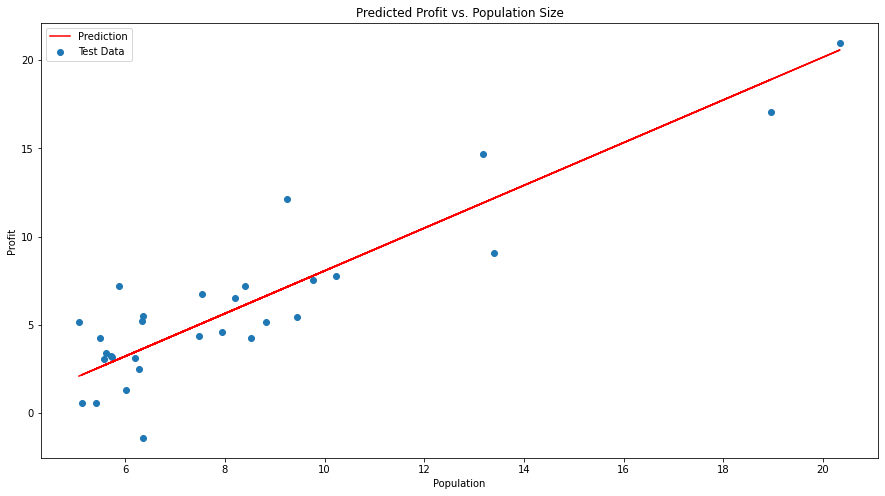

In [112]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

ax.plot(X_test, y_pred, 'r', label='Prediction')
ax.scatter(X_test, y_test, label='Test Data')
ax.legend(loc=2)